In [21]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [22]:
def read_player_events(experiment, generation, player):
    filename = f"stats/{experiment}/generations/gen_{generation}/player_{player}_stats.json"
    file1 = open(filename, "r")
    Lines = file1.readlines()

    player_events = []
    for line in Lines:
        try:
            record = json.loads(line)
            for e in record: player_events.append(e)
        except: pass
    return player_events

In [23]:
avg_agents_involved = {}
avg_rewards = []
avg_selfish = []
max_agents_involved = 5
avg_collaborative = []
generations = 1000
players = 5

# Collect for each generation
for gen in range(1, generations):
    
    count_agents_involved = {}
    rewards = []
    selfish = []
    collaborative = []
    
    try:
        # Average stats over all players
        for player in range(players):
            player_events = read_player_events("exp2_24_04_23", gen, player)

            # Number of agents involved
            agents_involved = np.array([e["agents_involved"] for e in player_events])

            for x in range(1, max_agents_involved+1):
                if x not in count_agents_involved: count_agents_involved[x] = []
                count_agents_involved[x].append(np.where(agents_involved == x)[0].shape[0])
            
            # Reward
            reward = np.array([e["reward"] for e in player_events])
            rewards.append(np.mean(reward))

            # Particular events
            above_level_selfish = np.array(
                [((e["agent_level"] >= e["food_level"]) and (e["agents_involved"] == 1)) for e in player_events]
            )
            above_level_collaborative = np.array(
                [((e["agent_level"] >= e["food_level"]) and (e["agents_involved"] > 1)) for e in player_events]
            )
            selfish.append(np.where(above_level_selfish == True)[0].shape[0])
            collaborative.append(np.where(above_level_collaborative == True)[0].shape[0])
    except:
        break
    
    # Collecting avgs across players
    for x in range(1, max_agents_involved+1):
        if x not in avg_agents_involved: avg_agents_involved[x] = []
        avg_agents_involved[x].append(np.mean(count_agents_involved[x]))
            
    avg_rewards.append(np.mean(rewards))
    avg_selfish.append(np.mean(selfish))
    avg_collaborative.append(np.mean(collaborative))

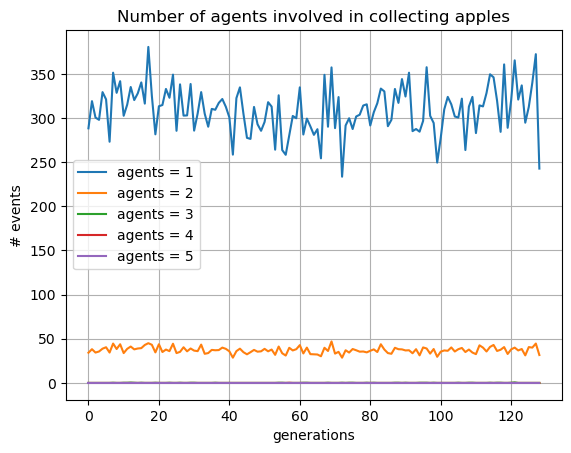

In [24]:
plt.title("Number of agents involved in collecting apples")
plt.xlabel("generations")
plt.ylabel("# events")

for x in range(1, max_agents_involved+1):
    plt.plot(avg_agents_involved[x], label=f"agents = {x}")

plt.legend()
plt.grid()

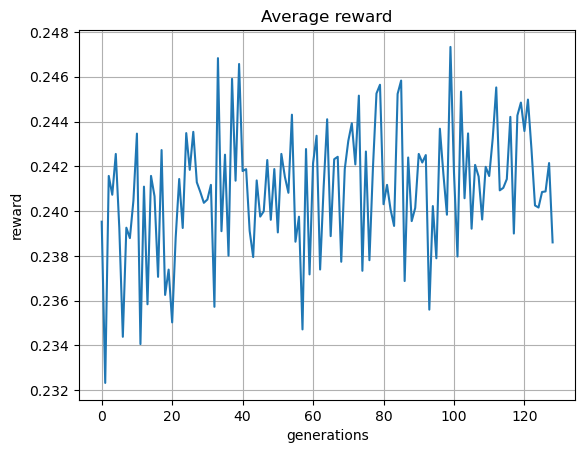

In [25]:
plt.title("Average reward")
plt.xlabel("generations")
plt.ylabel("reward")
plt.plot(avg_rewards, label="Avg. reward")
plt.grid()